<a href="https://colab.research.google.com/github/maulikam/portfolio-service/blob/master/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/all_stocks_historical_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np


# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,id,tradingsymbol,instrument_token,timestamps,open_price,high_price,low_price,close_price,volume,oi,created_at
0,4087137,AURIONPRO-BE,3078401,2023-01-10 00:00:00,373.95,374.30,361.50,365.10,25167,0,2024-04-04 11:22:35.956914
1,4087139,AURIONPRO-BE,3078401,2023-01-11 00:00:00,365.05,368.95,360.00,363.40,19389,0,2024-04-04 11:22:35.956914
2,4087140,AURIONPRO-BE,3078401,2023-01-12 00:00:00,362.10,366.50,355.40,357.70,16946,0,2024-04-04 11:22:35.956914
3,4087142,AURIONPRO-BE,3078401,2023-01-13 00:00:00,363.05,375.00,357.25,366.85,86370,0,2024-04-04 11:22:35.956915
4,4087144,AURIONPRO-BE,3078401,2023-01-16 00:00:00,364.10,371.05,361.25,365.30,43008,0,2024-04-04 11:22:35.956915


In [3]:
# List of trading symbols to filter
symbols = ['INDIA VIX', 'NIFTY 100', 'NIFTY 200', 'NIFTY 50', 'NIFTY 500',
       'NIFTY ALPHA 50', 'NIFTY ALPHALOWVOL', 'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY DIV OPPS 50', 'NIFTY ENERGY', 'NIFTY FIN SERVICE',
       'NIFTY FINSRV25 50', 'NIFTY FMCG', 'NIFTY GROWSECT 15',
       'NIFTY HEALTHCARE', 'NIFTY IND DIGITAL', 'NIFTY INDIA MFG',
       'NIFTY INFRA', 'NIFTY IT', 'NIFTY LARGEMID250', 'NIFTY M150 QLTY50',
       'NIFTY MEDIA', 'NIFTY METAL', 'NIFTY MICROCAP250', 'NIFTY MID SELECT',
       'NIFTY MIDCAP 100', 'NIFTY MIDCAP 150', 'NIFTY MIDCAP 50',
       'NIFTY MIDSML 400', 'NIFTY MNC', 'NIFTY NEXT 50', 'NIFTY OIL AND GAS',
       'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK', 'NIFTY PVT BANK',
       'NIFTY REALTY', 'NIFTY SERV SECTOR', 'NIFTY SMLCAP 100',
       'NIFTY SMLCAP 250', 'NIFTY SMLCAP 50', 'NIFTY TOTAL MKT',
       'NIFTY100 EQL WGT', 'NIFTY100 ESG', 'NIFTY100 LIQ 15',
       'NIFTY100 LOWVOL30', 'NIFTY100 QUALTY30', 'NIFTY100ESGSECLDR',
       'NIFTY200 QUALTY30', 'NIFTY200MOMENTM30', 'NIFTY50 DIV POINT',
       'NIFTY50 EQL WGT', 'NIFTY50 VALUE 20', 'NIFTY500 MULTICAP']

# Filter the dataframe for the given symbols
filtered_df = df[df['tradingsymbol'].isin(symbols)]

# Pivot the dataframe to get each trading symbol as a column
pivoted_df = filtered_df.pivot(index='timestamps', columns='tradingsymbol', values='close_price')

# Display the first few rows of the pivoted dataframe
print(pivoted_df.head())

tradingsymbol        INDIA VIX  NIFTY 100  NIFTY 200  NIFTY 50  NIFTY 500  \
timestamps                                                                  
2019-01-02 00:00:00      16.39   11032.00    5712.10  10792.50    9103.40   
2019-01-03 00:00:00      16.79   10914.80    5652.95  10672.25    9014.79   
2019-01-04 00:00:00      16.16   10966.15    5680.50  10727.35    9054.90   
2019-01-07 00:00:00      16.30   11005.10    5699.10  10771.80    9081.15   
2019-01-08 00:00:00      15.70   11031.30    5710.15  10802.15    9098.65   

tradingsymbol        NIFTY ALPHA 50  NIFTY ALPHALOWVOL  NIFTY AUTO  \
timestamps                                                           
2019-01-02 00:00:00        12108.15           11479.66     8902.65   
2019-01-03 00:00:00        11993.65           11411.15     8767.35   
2019-01-04 00:00:00        11945.25           11420.46     8809.35   
2019-01-07 00:00:00        11982.10           11483.23     8820.00   
2019-01-08 00:00:00        11948.90     

In [4]:
print(pivoted_df.columns)
print(df.columns)

Index(['INDIA VIX', 'NIFTY 100', 'NIFTY 200', 'NIFTY 50', 'NIFTY 500',
       'NIFTY ALPHA 50', 'NIFTY ALPHALOWVOL', 'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY DIV OPPS 50', 'NIFTY ENERGY', 'NIFTY FIN SERVICE',
       'NIFTY FINSRV25 50', 'NIFTY FMCG', 'NIFTY GROWSECT 15',
       'NIFTY HEALTHCARE', 'NIFTY IND DIGITAL', 'NIFTY INDIA MFG',
       'NIFTY INFRA', 'NIFTY IT', 'NIFTY LARGEMID250', 'NIFTY M150 QLTY50',
       'NIFTY MEDIA', 'NIFTY METAL', 'NIFTY MICROCAP250', 'NIFTY MID SELECT',
       'NIFTY MIDCAP 100', 'NIFTY MIDCAP 150', 'NIFTY MIDCAP 50',
       'NIFTY MIDSML 400', 'NIFTY MNC', 'NIFTY NEXT 50', 'NIFTY OIL AND GAS',
       'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK', 'NIFTY PVT BANK',
       'NIFTY REALTY', 'NIFTY SERV SECTOR', 'NIFTY SMLCAP 100',
       'NIFTY SMLCAP 250', 'NIFTY SMLCAP 50', 'NIFTY TOTAL MKT',
       'NIFTY100 EQL WGT', 'NIFTY100 ESG', 'NIFTY100 LIQ 15',
       'NIFTY10

In [5]:
# Ensure timestamps is a column in pivoted_df for merging
pivoted_df.reset_index(inplace=True)

# Merge the two dataframes on 'timestamps' column
# Assuming you want to keep all rows and columns from the original df and just add the closing prices from pivoted_df
merged_df = pd.merge(df, pivoted_df, on='timestamps', how='left')

# Display the first few rows of the merged dataframe
print(merged_df.head())


        id tradingsymbol  instrument_token           timestamps  open_price  \
0  4087137  AURIONPRO-BE           3078401  2023-01-10 00:00:00      373.95   
1  4087139  AURIONPRO-BE           3078401  2023-01-11 00:00:00      365.05   
2  4087140  AURIONPRO-BE           3078401  2023-01-12 00:00:00      362.10   
3  4087142  AURIONPRO-BE           3078401  2023-01-13 00:00:00      363.05   
4  4087144  AURIONPRO-BE           3078401  2023-01-16 00:00:00      364.10   

   high_price  low_price  close_price  volume  oi  ... NIFTY100 LIQ 15  \
0      374.30     361.50       365.10   25167   0  ...         4625.00   
1      368.95     360.00       363.40   19389   0  ...         4588.30   
2      366.50     355.40       357.70   16946   0  ...         4560.15   
3      375.00     357.25       366.85   86370   0  ...         4583.40   
4      371.05     361.25       365.30   43008   0  ...         4570.10   

   NIFTY100 LOWVOL30  NIFTY100 QUALTY30  NIFTY100ESGSECLDR  NIFTY200 QUALTY30  \

In [6]:
# Sort the dataframe by 'timestamps' column in ascending order (oldest to newest)
merged_df = merged_df.sort_values(by='timestamps')

# Display the first few rows of the sorted dataframe
merged_df.head()


,id,tradingsymbol,instrument_token,timestamps,open_price,high_price,low_price,close_price,volume,oi,...,NIFTY100 LIQ 15,NIFTY100 LOWVOL30,NIFTY100 QUALTY30,NIFTY100ESGSECLDR,NIFTY200 QUALTY30,NIFTY200MOMENTM30,NIFTY50 DIV POINT,NIFTY50 EQL WGT,NIFTY50 VALUE 20,NIFTY500 MULTICAP
568277,2396841,CHENNPETRO,524545,2019-01-02 00:00:00,288.00,292.65,281.30,285.00,654505,0,...,3756.55,8508.29,2597.15,1816.23,9363.51,NaN,NaN,NaN,5100.5,5717.68
410083,4497964,RHFL-BE,5564673,2019-01-02 00:00:00,41.10,41.60,40.60,40.75,152345,0,...,3756.55,8508.29,2597.15,1816.23,9363.51,NaN,NaN,NaN,5100.5,5717.68
1044821,2873321,EVERESTIND,254209,2019-01-02 00:00:00,509.80,512.00,503.00,505.85,6397,0,...,3756.55,8508.29,2597.15,1816.23,9363.51,NaN,NaN,NaN,5100.5,5717.68
1048509,2876230,BALRAMCHIN,87297,2019-01-02 00:00:00,102.35,104.90,101.85,104.50,2216466,0,...,3756.55,8508.29,2597.15,1816.23,9363.51,NaN,NaN,NaN,5100.5,5717.68
866438,2694349,VSSL,6929153,2019-01-02 00:00:00,49.00,49.00,48.30,48.60,21930,0,...,3756.55,8508.29,2597.15,1816.23,9363.51,NaN,NaN,NaN,5100.5,5717.68


In [7]:
merged_df.tail()

,id,tradingsymbol,instrument_token,timestamps,open_price,high_price,low_price,close_price,volume,oi,...,NIFTY100 LIQ 15,NIFTY100 LOWVOL30,NIFTY100 QUALTY30,NIFTY100ESGSECLDR,NIFTY200 QUALTY30,NIFTY200MOMENTM30,NIFTY50 DIV POINT,NIFTY50 EQL WGT,NIFTY50 VALUE 20,NIFTY500 MULTICAP
2193960,4021427,DYNAMATECH,1158401,2024-04-04 00:00:00,8240.4,8331.3,8051.00,8079.00,16595,0,...,6462.3,18125.8,5176.05,3733.25,18829.75,31521.85,NaN,28415.6,12287.35,14269.35
2194073,4021501,BLS,4423425,2024-04-04 00:00:00,348.0,352.2,343.55,349.15,2994563,0,...,6462.3,18125.8,5176.05,3733.25,18829.75,31521.85,NaN,28415.6,12287.35,14269.35
1855059,3682349,TATACOMM,952577,2024-04-04 00:00:00,2057.0,2079.5,2051.40,2063.85,512618,0,...,6462.3,18125.8,5176.05,3733.25,18829.75,31521.85,NaN,28415.6,12287.35,14269.35
2045705,3872320,SABAR-SM,2811393,2024-04-04 00:00:00,21.0,21.0,21.00,21.00,0,0,...,6462.3,18125.8,5176.05,3733.25,18829.75,31521.85,NaN,28415.6,12287.35,14269.35
1549055,3375955,TCLCONS-BE,4992769,2024-04-04 00:00:00,32.8,33.4,32.80,33.00,17955,0,...,6462.3,18125.8,5176.05,3733.25,18829.75,31521.85,NaN,28415.6,12287.35,14269.35


In [8]:
# Set the maximum number of columns to display to None (unlimited)
pd.options.display.max_columns = None

print(merged_df.tail())

              id tradingsymbol  instrument_token           timestamps  \
2193960  4021427    DYNAMATECH           1158401  2024-04-04 00:00:00   
2194073  4021501           BLS           4423425  2024-04-04 00:00:00   
1855059  3682349      TATACOMM            952577  2024-04-04 00:00:00   
2045705  3872320      SABAR-SM           2811393  2024-04-04 00:00:00   
1549055  3375955    TCLCONS-BE           4992769  2024-04-04 00:00:00   

         open_price  high_price  low_price  close_price   volume  oi  \
2193960      8240.4      8331.3    8051.00      8079.00    16595   0   
2194073       348.0       352.2     343.55       349.15  2994563   0   
1855059      2057.0      2079.5    2051.40      2063.85   512618   0   
2045705        21.0        21.0      21.00        21.00        0   0   
1549055        32.8        33.4      32.80        33.00    17955   0   

                         created_at  INDIA VIX  NIFTY 100  NIFTY 200  \
2193960   2024-04-04 11:22:17.00346      11.26   23234.5

In [9]:
print(merged_df.columns)

Index(['id', 'tradingsymbol', 'instrument_token', 'timestamps', 'open_price',
       'high_price', 'low_price', 'close_price', 'volume', 'oi', 'created_at',
       'INDIA VIX', 'NIFTY 100', 'NIFTY 200', 'NIFTY 50', 'NIFTY 500',
       'NIFTY ALPHA 50', 'NIFTY ALPHALOWVOL', 'NIFTY AUTO', 'NIFTY BANK',
       'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
       'NIFTY CPSE', 'NIFTY DIV OPPS 50', 'NIFTY ENERGY', 'NIFTY FIN SERVICE',
       'NIFTY FINSRV25 50', 'NIFTY FMCG', 'NIFTY GROWSECT 15',
       'NIFTY HEALTHCARE', 'NIFTY IND DIGITAL', 'NIFTY INDIA MFG',
       'NIFTY INFRA', 'NIFTY IT', 'NIFTY LARGEMID250', 'NIFTY M150 QLTY50',
       'NIFTY MEDIA', 'NIFTY METAL', 'NIFTY MICROCAP250', 'NIFTY MID SELECT',
       'NIFTY MIDCAP 100', 'NIFTY MIDCAP 150', 'NIFTY MIDCAP 50',
       'NIFTY MIDSML 400', 'NIFTY MNC', 'NIFTY NEXT 50', 'NIFTY OIL AND GAS',
       'NIFTY PHARMA', 'NIFTY PSE', 'NIFTY PSU BANK', 'NIFTY PVT BANK',
       'NIFTY REALTY', 'NIFTY SERV SECTOR', 'NIFT

In [10]:
# Ensure 'timestamps' column is in datetime format
merged_df['timestamps'] = pd.to_datetime(merged_df['timestamps'])

# Sort the DataFrame by 'instrument_token' and 'timestamps'
merged_df = merged_df.sort_values(by=['instrument_token', 'timestamps'])

# Calculate the percentage change in 'close_price' for each 'instrument_token'
merged_df['%changedaily'] = merged_df.groupby('instrument_token')['close_price'].pct_change() * 100

# Display the first few rows to confirm the new column
print(merged_df.head())


             id tradingsymbol  instrument_token timestamps  open_price  \
287554  4374999   GOLDSTAR-SM               257 2019-02-21        1.30   
287555  4375001   GOLDSTAR-SM               257 2019-02-25        1.15   
287556  4375008   GOLDSTAR-SM               257 2019-03-07        1.20   
287557  4375010   GOLDSTAR-SM               257 2019-03-19        1.15   
287558  4375013   GOLDSTAR-SM               257 2019-04-22        1.15   

        high_price  low_price  close_price  volume  oi  \
287554        1.30       1.15         1.25  405000   0   
287555        1.30       1.15         1.30  270000   0   
287556        1.20       1.20         1.20  135000   0   
287557        1.25       1.15         1.25  540000   0   
287558        1.15       1.15         1.15  135000   0   

                        created_at  INDIA VIX  NIFTY 100  NIFTY 200  NIFTY 50  \
287554  2024-04-04 11:24:44.205169      16.05   10925.05    5617.25  10789.85   
287555  2024-04-04 11:24:44.205172      15.3

In [11]:
# Assuming daily frequency and trading days as above

# Calculate weekly percentage change
merged_df['%change_weekly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.pct_change(periods=5) * 100)

# Calculate monthly percentage change
merged_df['%change_monthly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.pct_change(periods=21) * 100)

# Calculate quarterly percentage change
merged_df['%change_quarterly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.pct_change(periods=63) * 100)

# Calculate yearly percentage change
merged_df['%change_yearly'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.pct_change(periods=252) * 100)

# Display the last few rows to confirm the new columns
print(merged_df.tail())

              id tradingsymbol  instrument_token timestamps  open_price  \
1256826  3083580         SREEL           8150273 2024-03-28      283.00   
1256827  3083584         SREEL           8150273 2024-04-01      276.50   
1256828  3083588         SREEL           8150273 2024-04-02      293.55   
1256829  3083592         SREEL           8150273 2024-04-03      296.65   
1256830  3083598         SREEL           8150273 2024-04-04      309.40   

         high_price  low_price  close_price  volume  oi  \
1256826      288.15     270.55       276.40   17496   0   
1256827      306.00     276.50       292.05   20563   0   
1256828      300.05     287.95       296.65   20317   0   
1256829      310.20     295.45       307.80   20637   0   
1256830      318.10     304.35       306.00   10655   0   

                         created_at  INDIA VIX  NIFTY 100  NIFTY 200  \
1256826  2024-04-04 11:20:04.641525      12.83   22920.70   12329.75   
1256827  2024-04-04 11:20:04.641525      12.08   2

In [12]:
# Calculate SMA for the specified periods
merged_df['SMA_05'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=5).mean())
merged_df['SMA_10'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=10).mean())
merged_df['SMA_20'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=20).mean())
merged_df['SMA_50'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=50).mean())
merged_df['SMA_100'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=100).mean())
merged_df['SMA_200'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=200).mean())
merged_df['SMA_300'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=300).mean())
merged_df['SMA_400'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=400).mean())

# Display the last few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'SMA_05', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'SMA_300', 'SMA_400']].tail())


        timestamps  instrument_token  close_price  SMA_05   SMA_10    SMA_20  \
1256826 2024-03-28           8150273       276.40  283.48  287.320  295.7725   
1256827 2024-04-01           8150273       292.05  283.82  286.835  295.0825   
1256828 2024-04-02           8150273       296.65  285.34  287.675  294.4025   
1256829 2024-04-03           8150273       307.80  290.67  289.165  293.9650   
1256830 2024-04-04           8150273       306.00  295.78  290.820  293.8775   

          SMA_50   SMA_100    SMA_200     SMA_300     SMA_400  
1256826  328.380  329.5185  276.31275  246.286167  238.450000  
1256827  327.010  329.8980  276.79750  246.565333  238.722375  
1256828  325.928  330.3525  277.28150  246.863667  239.014125  
1256829  324.650  330.6115  277.82375  247.182833  239.338375  
1256830  323.273  330.9265  278.35650  247.492000  239.651000  


In [13]:
# Calculate EMA for the specified periods
merged_df['EMA_5'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=5, adjust=True).mean())
merged_df['EMA_10'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=10, adjust=True).mean())
merged_df['EMA_20'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=20, adjust=True).mean())
merged_df['EMA_50'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=50, adjust=True).mean())
merged_df['EMA_100'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=100, adjust=True).mean())
merged_df['EMA_200'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=200, adjust=True).mean())
merged_df['EMA_300'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=300, adjust=True).mean())
merged_df['EMA_400'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=400, adjust=True).mean())

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'EMA_300', 'EMA_400']].tail())


        timestamps  instrument_token  close_price       EMA_5      EMA_10  \
1256826 2024-03-28           8150273       276.40  282.029543  286.741925   
1256827 2024-04-01           8150273       292.05  285.369695  287.707029   
1256828 2024-04-02           8150273       296.65  289.129797  289.333024   
1256829 2024-04-03           8150273       307.80  295.353198  292.690656   
1256830 2024-04-04           8150273       306.00  298.902132  295.110537   

             EMA_20      EMA_50     EMA_100     EMA_200     EMA_300  \
1256826  296.228167  314.790717  312.252225  286.787143  266.836498   
1256827  295.830247  313.898924  311.852181  286.839510  267.004058   
1256828  295.908318  313.222495  311.551148  286.937127  267.201075   
1256829  297.040860  313.009849  311.476868  287.144718  267.470881   
1256830  297.894111  312.734953  311.368415  287.332333  267.726931   

            EMA_400  
1256826  252.452576  
1256827  252.650365  
1256828  252.870142  
1256829  253.144513  


In [14]:
def calculate_rsi(series, period=14):
    # Calculate daily price changes
    delta = series.diff(1)

    # Separate gains and losses
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    # Calculate the average of gains and losses
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    # Calculate the relative strength (RS)
    RS = avg_gain / avg_loss

    # Calculate the RSI
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Calculate RSI for specified periods and add to the DataFrame
merged_df['RSI_9'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: calculate_rsi(x, 9))
merged_df['RSI_14'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: calculate_rsi(x, 14))
merged_df['RSI_21'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: calculate_rsi(x, 21))

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'RSI_9', 'RSI_14', 'RSI_21']].tail())

        timestamps  instrument_token  close_price      RSI_9     RSI_14  \
1256826 2024-03-28           8150273       276.40  19.764012  33.971044   
1256827 2024-04-01           8150273       292.05  54.645477  40.521658   
1256828 2024-04-02           8150273       296.65  54.589963  46.835443   
1256829 2024-04-03           8150273       307.80  68.898043  58.173785   
1256830 2024-04-04           8150273       306.00  67.987805  67.138810   

            RSI_21  
1256826  35.121234  
1256827  43.578297  
1256828  46.834136  
1256829  49.194344  
1256830  46.424941  


In [15]:
def add_mean_deviation(df, periods):
    TP = (df['high_price'] + df['low_price'] + df['close_price']) / 3
    for period in periods:
        deviation = TP - TP.rolling(window=period).mean()
        mean_deviation = deviation.abs().rolling(window=period).mean()
        df[f'mean_deviation_{period}'] = mean_deviation

def calculate_cci(df, period):
    TP = (df['high_price'] + df['low_price'] + df['close_price']) / 3
    SMA_TP = TP.rolling(window=period).mean()
    mean_deviation = df[f'mean_deviation_{period}']
    CCI = (TP - SMA_TP) / (0.015 * mean_deviation)
    df[f'CCI_{period}'] = CCI

# Calculate mean deviation for specified periods and store in the DataFrame
periods = [9, 14, 21]
add_mean_deviation(merged_df, periods)

# Calculate CCI for each period using the stored mean deviation
for period in periods:
    calculate_cci(merged_df, period)

# Display the first few rows to verify the calculations
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'mean_deviation_9', 'mean_deviation_14', 'mean_deviation_21', 'CCI_9', 'CCI_14', 'CCI_21']].tail())


        timestamps  instrument_token  close_price  mean_deviation_9  \
1256826 2024-03-28           8150273       276.40          5.297737   
1256827 2024-04-01           8150273       292.05          4.627984   
1256828 2024-04-02           8150273       296.65          4.719547   
1256829 2024-04-03           8150273       307.80          5.758848   
1256830 2024-04-04           8150273       306.00          7.316872   

         mean_deviation_14  mean_deviation_21       CCI_9      CCI_14  \
1256826          12.585459          20.850113 -123.835787  -68.124726   
1256827          12.311139          19.592744   47.963720    9.347580   
1256828          11.960374          18.022071   92.104460   32.322342   
1256829          11.704252          17.089909  169.658425   83.716695   
1256830          10.916922          16.772562  160.309336  108.009108   

            CCI_21  
1256826 -63.372449  
1256827 -19.035770  
1256828  -5.903989  
1256829  32.551156  
1256830  54.340449  


In [16]:
# Calculate the 12-period EMA and 26-period EMA for the close price
merged_df['EMA_12'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
merged_df['EMA_26'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

# Calculate the MACD by subtracting the 26-period EMA from the 12-period EMA
merged_df['MACD'] = merged_df['EMA_12'] - merged_df['EMA_26']

# Calculate the signal line as the 9-period EMA of the MACD
merged_df['MACD_signal'] = merged_df.groupby('instrument_token')['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'MACD', 'MACD_signal']].tail())


        timestamps  instrument_token  close_price       MACD  MACD_signal
1256826 2024-03-28           8150273       276.40 -13.047098   -13.101949
1256827 2024-04-01           8150273       292.05 -11.805117   -12.842583
1256828 2024-04-02           8150273       296.65 -10.330573   -12.340181
1256829 2024-04-03           8150273       307.80  -8.168117   -11.505768
1256830 2024-04-04           8150273       306.00  -6.524391   -10.509493


In [17]:
# Define the period for the Bollinger Bands
period = 20

# Calculate the Middle Band, which is the 20-day SMA of the closing prices
merged_df['BB_middle'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=period).mean())

# Calculate the Standard Deviation of the closing prices over the last 20 days
merged_df['BB_std'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=period).std())

# Calculate the Upper and Lower Bands
merged_df['BB_upper'] = merged_df['BB_middle'] + (2 * merged_df['BB_std'])
merged_df['BB_lower'] = merged_df['BB_middle'] - (2 * merged_df['BB_std'])

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'BB_middle', 'BB_upper', 'BB_lower']].tail())

        timestamps  instrument_token  close_price  BB_middle    BB_upper  \
1256826 2024-03-28           8150273       276.40   295.7725  321.312674   
1256827 2024-04-01           8150273       292.05   295.0825  320.218787   
1256828 2024-04-02           8150273       296.65   294.4025  318.526576   
1256829 2024-04-03           8150273       307.80   293.9650  316.673753   
1256830 2024-04-04           8150273       306.00   293.8775  316.375113   

           BB_lower  
1256826  270.232326  
1256827  269.946213  
1256828  270.278424  
1256829  271.256247  
1256830  271.379887  


In [18]:
# Group by instrument_token, then apply the calculation on a rolling 7-day (or 5 trading days) basis
merged_df['VWAP_weekly'] = merged_df.groupby('instrument_token').apply(
    lambda x: (x['close_price'] * x['volume']).rolling(window=5).sum() / x['volume'].rolling(window=5).sum()
).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'VWAP_weekly']].tail())

        timestamps  instrument_token  close_price  volume  VWAP_weekly
1256826 2024-03-28           8150273       276.40   17496   283.379540
1256827 2024-04-01           8150273       292.05   20563   284.043248
1256828 2024-04-02           8150273       296.65   20317   285.619840
1256829 2024-04-03           8150273       307.80   20637   290.957013
1256830 2024-04-04           8150273       306.00   10655   295.321131


In [19]:
# VWAP monthly calculation assuming approximately 21 trading days in a month
merged_df['VWAP_monthly'] = merged_df.groupby('instrument_token').apply(
    lambda x: (x['close_price'] * x['volume']).rolling(window=21).sum() / x['volume'].rolling(window=21).sum()
).reset_index(level=0, drop=True)

# VWAP yearly calculation assuming approximately 252 trading days in a year
merged_df['VWAP_yearly'] = merged_df.groupby('instrument_token').apply(
    lambda x: (x['close_price'] * x['volume']).rolling(window=252).sum() / x['volume'].rolling(window=252).sum()
).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'VWAP_weekly', 'VWAP_monthly', 'VWAP_yearly']].tail())


        timestamps  instrument_token  close_price  volume  VWAP_weekly  \
1256826 2024-03-28           8150273       276.40   17496   283.379540   
1256827 2024-04-01           8150273       292.05   20563   284.043248   
1256828 2024-04-02           8150273       296.65   20317   285.619840   
1256829 2024-04-03           8150273       307.80   20637   290.957013   
1256830 2024-04-04           8150273       306.00   10655   295.321131   

         VWAP_monthly  VWAP_yearly  
1256826    293.960210   302.513209  
1256827    292.710707   302.890030  
1256828    292.175747   302.913610  
1256829    292.644134   303.057727  
1256830    292.829047   303.420874  


In [20]:
# Calculate the 52-week high for each instrument_token
merged_df['52_week_high'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=252).max())

# Calculate the percentage difference from the 52-week high
merged_df['%diff_52_week_high'] = ((merged_df['close_price'] - merged_df['52_week_high']) / merged_df['52_week_high']) * 100

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', '52_week_high', '%diff_52_week_high']].tail())


        timestamps  instrument_token  close_price  52_week_high  \
1256826 2024-03-28           8150273       276.40        406.35   
1256827 2024-04-01           8150273       292.05        406.35   
1256828 2024-04-02           8150273       296.65        406.35   
1256829 2024-04-03           8150273       307.80        406.35   
1256830 2024-04-04           8150273       306.00        406.35   

         %diff_52_week_high  
1256826          -31.979820  
1256827          -28.128461  
1256828          -26.996432  
1256829          -24.252492  
1256830          -24.695460  


In [21]:
# Calculate the 52-week low for each instrument_token
merged_df['52_week_low'] = merged_df.groupby('instrument_token')['close_price'].transform(lambda x: x.rolling(window=252).min())

# Calculate the percentage difference from the 52-week low
merged_df['%diff_from_52_week_low'] = ((merged_df['close_price'] - merged_df['52_week_low']) / merged_df['52_week_low']) * 100

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', '52_week_low', '%diff_from_52_week_low']].tail())


        timestamps  instrument_token  close_price  52_week_low  \
1256826 2024-03-28           8150273       276.40       164.50   
1256827 2024-04-01           8150273       292.05       164.50   
1256828 2024-04-02           8150273       296.65       164.50   
1256829 2024-04-03           8150273       307.80       164.50   
1256830 2024-04-04           8150273       306.00       166.05   

         %diff_from_52_week_low  
1256826               68.024316  
1256827               77.537994  
1256828               80.334347  
1256829               87.112462  
1256830               84.281843  


In [22]:
def calculate_pvroc_and_volume_roc(df, period=14):
    # Calculate the Rate of Change for the price
    price_roc = df['close_price'].pct_change(periods=period) * 100

    # Calculate the Rate of Change for the volume
    volume_roc = df['volume'].pct_change(periods=period) * 100
    df[f'Volume_ROC_{period}'] = volume_roc  # Store the volume rate of change

    # Combine the two to get a Price-Volume Rate of Change
    df[f'PVROC_{period}'] = price_roc * volume_roc

    return df

# Apply the PVROC and Volume ROC function to the DataFrame
periods = [7, 14, 28, 56, 252]  # You can choose periods that make sense for your analysis
for period in periods:
    merged_df = calculate_pvroc_and_volume_roc(merged_df, period)

# Display the first few rows to confirm the new columns
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'Volume_ROC_7', 'PVROC_7', 'Volume_ROC_14', 'PVROC_14', 'Volume_ROC_28', 'PVROC_28', 'Volume_ROC_56', 'PVROC_56', 'Volume_ROC_252', 'PVROC_252']].tail())


        timestamps  instrument_token  close_price  volume  Volume_ROC_7  \
1256826 2024-03-28           8150273       276.40   17496     63.958392   
1256827 2024-04-01           8150273       292.05   20563     87.669983   
1256828 2024-04-02           8150273       296.65   20317     25.405839   
1256829 2024-04-03           8150273       307.80   20637     27.294597   
1256830 2024-04-04           8150273       306.00   10655    -47.045375   

            PVROC_7  Volume_ROC_14    PVROC_14  Volume_ROC_28    PVROC_28  \
1256826 -360.298213      -4.367313   44.042524     -50.686321  733.947972   
1256827   78.750028      24.367969 -158.735010     -32.739108  359.276902   
1256828   73.582642      18.425041  -39.506108     -13.947480  133.116670   
1256829  164.040197     -21.574067 -123.375654     -32.362099  169.382907   
1256830 -275.875840     -69.709461 -764.718475     -42.978701  219.258684   

         Volume_ROC_56     PVROC_56  Volume_ROC_252     PVROC_252  
1256826     -71.50

In [23]:
def calculate_atr(df, period=14):
    # Calculate the true range (TR)
    high_low = df['high_price'] - df['low_price']
    high_close = (df['high_price'] - df['close_price'].shift()).abs()
    low_close = (df['low_price'] - df['close_price'].shift()).abs()
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)

    # Calculate the ATR as the rolling average of the TR
    atr = tr.rolling(window=period).mean()

    return atr

# Group by instrument_token and apply the ATR calculation function
merged_df['ATR_14'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_atr(x, 14)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'high_price', 'low_price', 'close_price', 'ATR_14']].tail())


        timestamps  instrument_token  high_price  low_price  close_price  \
1256826 2024-03-28           8150273      288.15     270.55       276.40   
1256827 2024-04-01           8150273      306.00     276.50       292.05   
1256828 2024-04-02           8150273      300.05     287.95       296.65   
1256829 2024-04-03           8150273      310.20     295.45       307.80   
1256830 2024-04-04           8150273      318.10     304.35       306.00   

            ATR_14  
1256826  15.603571  
1256827  17.175000  
1256828  17.196429  
1256829  16.775000  
1256830  16.139286  


In [24]:
def calculate_obv(df):
    # Calculate the daily price change
    price_change = df['close_price'].diff()

    # Determine the direction of trade for each day
    direction = price_change.apply(np.sign)

    # Calculate OBV by cumulatively summing the volume adjusted by its trading direction
    obv = (direction * df['volume']).cumsum()

    return obv

# Apply the OBV function to the DataFrame, grouped by 'instrument_token'
merged_df['OBV'] = merged_df.groupby('instrument_token').apply(calculate_obv).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'OBV']].tail())


        timestamps  instrument_token  close_price  volume        OBV
1256826 2024-03-28           8150273       276.40   17496  7130770.0
1256827 2024-04-01           8150273       292.05   20563  7151333.0
1256828 2024-04-02           8150273       296.65   20317  7171650.0
1256829 2024-04-03           8150273       307.80   20637  7192287.0
1256830 2024-04-04           8150273       306.00   10655  7181632.0


In [25]:
def calculate_volume_rsi(df, period=14):
    # Calculate daily volume change
    delta_volume = df['volume'].diff()

    # Separate the up-volume and down-volume
    up_volume = delta_volume.clip(lower=0)
    down_volume = -delta_volume.clip(upper=0)

    # Calculate the exponential moving average of up-volume and down-volume
    avg_up_volume = up_volume.rolling(window=period).mean()
    avg_down_volume = down_volume.rolling(window=period).mean()

    # Calculate the Volume RSI
    RS = avg_up_volume / avg_down_volume
    volume_rsi = 100 - (100 / (1 + RS))

    return volume_rsi

# Apply the Volume RSI function to each group in the DataFrame
merged_df['Volume_RSI_14'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_volume_rsi(x, 14)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'Volume_RSI_14']].tail())


        timestamps  instrument_token  close_price  volume  Volume_RSI_14
1256826 2024-03-28           8150273       276.40   17496      49.381589
1256827 2024-04-01           8150273       292.05   20563      53.056580
1256828 2024-04-02           8150273       296.65   20317      52.411836
1256829 2024-04-03           8150273       307.80   20637      44.993209
1256830 2024-04-04           8150273       306.00   10655      28.792832


In [26]:
def calculate_vpt(df):
    # Calculate percentage change in price
    price_change = df['close_price'].pct_change()

    # Calculate the VPT
    vpt = (df['volume'] * price_change).cumsum()

    return vpt

# Apply the VPT function to each group in the DataFrame
merged_df['VPT'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_vpt(x)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'VPT']].tail())


        timestamps  instrument_token  close_price  volume            VPT
1256826 2024-03-28           8150273       276.40   17496  933785.349818
1256827 2024-04-01           8150273       292.05   20563  934949.644138
1256828 2024-04-02           8150273       296.65   20317  935269.651671
1256829 2024-04-03           8150273       307.80   20637  936045.321821
1256830 2024-04-04           8150273       306.00   10655  935983.011880


In [27]:
def calculate_mfi(group, period=14):
    # Calculate Typical Price
    typical_price = (group['high_price'] + group['low_price'] + group['close_price']) / 3

    # Calculate Raw Money Flow
    raw_money_flow = typical_price * group['volume']

    # Shift the typical price to compare with the previous day
    shifted_typical_price = typical_price.shift(1)

    # Calculate Positive and Negative Money Flow
    positive_flow = pd.Series(np.where(typical_price > shifted_typical_price, raw_money_flow, 0), index=group.index)
    negative_flow = pd.Series(np.where(typical_price < shifted_typical_price, raw_money_flow, 0), index=group.index)

    # Calculate the 14-period sum of Positive and Negative Money Flow
    positive_flow_sum = positive_flow.rolling(window=period).sum()
    negative_flow_sum = negative_flow.rolling(window=period).sum()

    # Calculate Money Flow Ratio
    money_flow_ratio = positive_flow_sum / negative_flow_sum

    # Calculate Money Flow Index
    mfi = 100 - (100 / (1 + money_flow_ratio))

    return mfi

# Apply the MFI function to each group in the DataFrame and compute MFI
merged_df['MFI_14'] = merged_df.groupby('instrument_token', group_keys=False).apply(calculate_mfi)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'volume', 'MFI_14']].tail())


        timestamps  instrument_token  close_price  volume     MFI_14
1256826 2024-03-28           8150273       276.40   17496  29.806247
1256827 2024-04-01           8150273       292.05   20563  30.582263
1256828 2024-04-02           8150273       296.65   20317  38.068185
1256829 2024-04-03           8150273       307.80   20637  47.138594
1256830 2024-04-04           8150273       306.00   10655  56.446131


In [28]:
def calculate_cmo(df, period=10):
    # Calculate price change from previous day
    delta = df['close_price'].diff()

    # Sum of gains and losses
    gain = delta.where(delta > 0, 0).rolling(window=period).sum()
    loss = -delta.where(delta < 0, 0).rolling(window=period).sum()

    # Calculate the Chande Momentum Oscillator
    cmo = ((gain - loss) / (gain + loss)) * 100

    return cmo

# Apply the CMO function to each group in the DataFrame
merged_df['CMO_10'] = merged_df.groupby('instrument_token').apply(lambda x: calculate_cmo(x)).reset_index(level=0, drop=True)

# Display the first few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'CMO_10']].tail())


        timestamps  instrument_token  close_price     CMO_10
1256826 2024-03-28           8150273       276.40   1.180745
1256827 2024-04-01           8150273       292.05  -9.788093
1256828 2024-04-02           8150273       296.65  18.461538
1256829 2024-04-03           8150273       307.80  28.653846
1256830 2024-04-04           8150273       306.00  32.869911


In [29]:
print(merged_df.columns)

Index(['id', 'tradingsymbol', 'instrument_token', 'timestamps', 'open_price',
       'high_price', 'low_price', 'close_price', 'volume', 'oi',
       ...
       'Volume_ROC_56', 'PVROC_56', 'Volume_ROC_252', 'PVROC_252', 'ATR_14',
       'OBV', 'Volume_RSI_14', 'VPT', 'MFI_14', 'CMO_10'],
      dtype='object', length=131)


In [30]:
print(len(merged_df))

2259780


In [31]:
total_memory_usage = merged_df.memory_usage(deep=True).sum()
print(f"Total memory usage: {total_memory_usage / (1024**2)} MB")


Total memory usage: 2560.1320943832397 MB


In [32]:
desired_chunk_size_mb = 500  # Desired chunk size in MB
row_memory = total_memory_usage / len(merged_df)  # Average memory usage per row
chunk_size = int((desired_chunk_size_mb * (1024**2)) / row_memory)  # Number of rows per chunk
print(f"Chunk size: {chunk_size} rows")

Chunk size: 441340 rows


In [33]:
# # saving merged_df in drive
# merged_df.to_csv('/content/drive/My Drive/merged_data.csv', index=True)  # Save to Drive

# chunk_size = 100000  # Adjust based on your needs
# for i in range(0, len(merged_df), chunk_size):
#     chunk = merged_df.iloc[i:i+chunk_size]
#     chunk.to_csv(f'/content/drive/My Drive/stocks_data/merged_data_part_{i//chunk_size}.csv', index=True)

In [34]:
# prompt: print all the columns of merged_df, all columns, print(merged_df.columns) wont print all columns

# Print all columns using a loop
for column in merged_df:
    print(column)


id
tradingsymbol
instrument_token
timestamps
open_price
high_price
low_price
close_price
volume
oi
created_at
INDIA VIX
NIFTY 100
NIFTY 200
NIFTY 50
NIFTY 500
NIFTY ALPHA 50
NIFTY ALPHALOWVOL
NIFTY AUTO
NIFTY BANK
NIFTY COMMODITIES
NIFTY CONSR DURBL
NIFTY CONSUMPTION
NIFTY CPSE
NIFTY DIV OPPS 50
NIFTY ENERGY
NIFTY FIN SERVICE
NIFTY FINSRV25 50
NIFTY FMCG
NIFTY GROWSECT 15
NIFTY HEALTHCARE
NIFTY IND DIGITAL
NIFTY INDIA MFG
NIFTY INFRA
NIFTY IT
NIFTY LARGEMID250
NIFTY M150 QLTY50
NIFTY MEDIA
NIFTY METAL
NIFTY MICROCAP250
NIFTY MID SELECT
NIFTY MIDCAP 100
NIFTY MIDCAP 150
NIFTY MIDCAP 50
NIFTY MIDSML 400
NIFTY MNC
NIFTY NEXT 50
NIFTY OIL AND GAS
NIFTY PHARMA
NIFTY PSE
NIFTY PSU BANK
NIFTY PVT BANK
NIFTY REALTY
NIFTY SERV SECTOR
NIFTY SMLCAP 100
NIFTY SMLCAP 250
NIFTY SMLCAP 50
NIFTY TOTAL MKT
NIFTY100 EQL WGT
NIFTY100 ESG
NIFTY100 LIQ 15
NIFTY100 LOWVOL30
NIFTY100 QUALTY30
NIFTY100ESGSECLDR
NIFTY200 QUALTY30
NIFTY200MOMENTM30
NIFTY50 DIV POINT
NIFTY50 EQL WGT
NIFTY50 VALUE 20
NIFTY500 MUL

In [35]:
# prompt: Perform statistical analysis on the various technical indicators to understand their relationships and identify potential trading opportunities.

# Perform statistical analysis on the technical indicators

# Calculate correlations between technical indicators
correlations = merged_df[['SMA_05','SMA_10','SMA_20','SMA_50','SMA_100','SMA_200','SMA_300','SMA_400','EMA_5','EMA_10','EMA_20','EMA_50','EMA_100','EMA_200','EMA_300','EMA_400','RSI_9','RSI_14','RSI_21','mean_deviation_9','mean_deviation_14','mean_deviation_21','CCI_9','CCI_14','CCI_21','EMA_12','EMA_26','MACD','MACD_signal','BB_middle','BB_std','BB_upper','BB_lower','VWAP_weekly','VWAP_monthly','VWAP_yearly','52_week_high','%diff_52_week_high','52_week_low','%diff_from_52_week_low','Volume_ROC_7','PVROC_7','Volume_ROC_14','PVROC_14','Volume_ROC_28','PVROC_28','Volume_ROC_56','PVROC_56','Volume_ROC_252','PVROC_252','ATR_14','OBV','Volume_RSI_14','VPT','MFI_14','CMO_10']].corr()

# Print the correlation matrix
print(correlations)

# Analyze the correlations to identify potential trading opportunities
# For example, if two indicators are highly correlated, you might consider using one as a confirmation for the other when making trading decisions.

# Perform other statistical analysis as needed, such as calculating standard deviations, skewness, and kurtosis.


                          SMA_05    SMA_10    SMA_20    SMA_50   SMA_100  \
SMA_05                  1.000000  0.999900  0.999551  0.998349  0.996491   
SMA_10                  0.999900  1.000000  0.999802  0.998695  0.996846   
SMA_20                  0.999551  0.999802  1.000000  0.999265  0.997497   
SMA_50                  0.998349  0.998695  0.999265  1.000000  0.999031   
SMA_100                 0.996491  0.996846  0.997497  0.999031  1.000000   
SMA_200                 0.993298  0.993644  0.994306  0.996161  0.998370   
SMA_300                 0.990361  0.990680  0.991322  0.993302  0.995977   
SMA_400                 0.989103  0.989384  0.989930  0.991671  0.994037   
EMA_5                   0.999990  0.999902  0.999574  0.998386  0.996533   
EMA_10                  0.999942  0.999982  0.999806  0.998752  0.996924   
EMA_20                  0.999712  0.999884  0.999964  0.999304  0.997623   
EMA_50                  0.998892  0.999181  0.999588  0.999899  0.999040   
EMA_100     

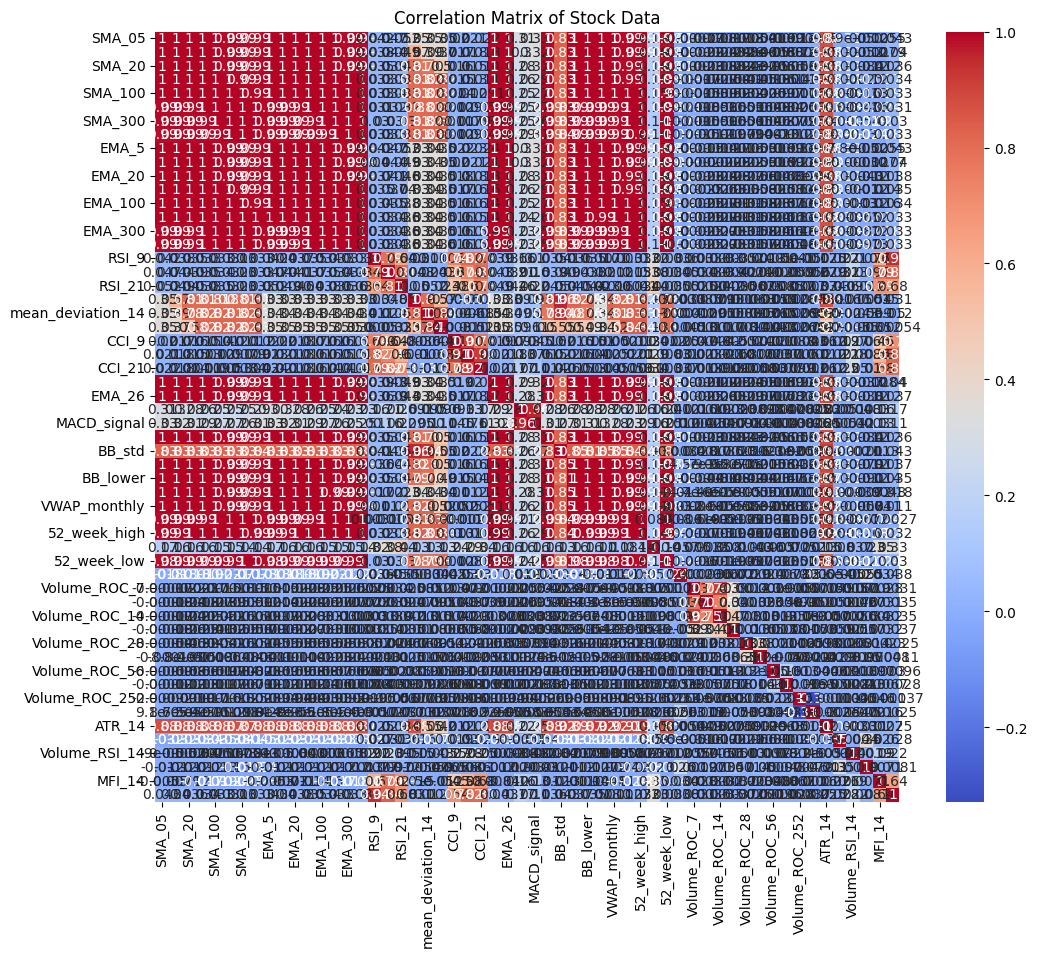

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Stock Data")
plt.show()


In [38]:
# Define the list of indicators to be used for momentum score calculation
indicators = [
    'RSI_14', 'Volume_ROC_14', 'OBV', 'ATR_14', 'MACD', 'CMO_10', 'volume',
    'INDIA VIX', 'NIFTY 100', 'NIFTY 200', 'NIFTY 50', 'NIFTY 500',
    'NIFTY ALPHA 50', 'NIFTY ALPHALOWVOL', 'NIFTY AUTO', 'NIFTY BANK',
    'NIFTY COMMODITIES', 'NIFTY CONSR DURBL', 'NIFTY CONSUMPTION',
    'NIFTY CPSE', 'NIFTY DIV OPPS 50', 'NIFTY ENERGY', 'NIFTY FIN SERVICE',
    'NIFTY FINSRV25 50', 'NIFTY FMCG', 'NIFTY GROWSECT 15', 'NIFTY HEALTHCARE',
    'NIFTY IND DIGITAL', 'NIFTY INDIA MFG', 'NIFTY INFRA', 'NIFTY IT',
    'NIFTY LARGEMID250', 'NIFTY M150 QLTY50', 'NIFTY MEDIA', 'NIFTY METAL',
    'NIFTY MICROCAP250', 'NIFTY MID SELECT', 'NIFTY MIDCAP 100',
    'NIFTY MIDCAP 150', 'NIFTY MIDCAP 50', 'NIFTY MIDSML 400', 'NIFTY MNC',
    'NIFTY NEXT 50', 'NIFTY OIL AND GAS', 'NIFTY PHARMA', 'NIFTY PSE',
    'NIFTY PSU BANK', 'NIFTY PVT BANK', 'NIFTY REALTY', 'NIFTY SERV SECTOR',
    'NIFTY SMLCAP 100', 'NIFTY SMLCAP 250', 'NIFTY SMLCAP 50', 'NIFTY TOTAL MKT',
    'NIFTY100 EQL WGT', 'NIFTY100 ESG', 'NIFTY100 LIQ 15', 'NIFTY100 LOWVOL30',
    'NIFTY100 QUALTY30', 'NIFTY100ESGSECLDR', 'NIFTY200 QUALTY30', 'NIFTY200MOMENTM30'
]

# Convert indicator columns to numeric, handling errors and ensuring no data loss
for column in indicators:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

# Function to normalize indicators and calculate momentum score
def normalize_and_calculate_momentum(group):
    normalized = (group[indicators] - group[indicators].min()) / (group[indicators].max() - group[indicators].min())
    return normalized.mean(axis=1)

# Apply the function and calculate the momentum score for each instrument_token
momentum_scores = merged_df.groupby('instrument_token').apply(normalize_and_calculate_momentum)

# Ensure that the resulting series aligns with the DataFrame's index
merged_df['momentum_score'] = momentum_scores.values  # Assign the values directly to match the DataFrame's structure

# Display the last few rows to confirm the new column
print(merged_df[['timestamps', 'instrument_token', 'close_price', 'momentum_score']].tail())


        timestamps  instrument_token  close_price  momentum_score
1256826 2024-03-28           8150273       276.40        0.862470
1256827 2024-04-01           8150273       292.05        0.879606
1256828 2024-04-02           8150273       296.65        0.890387
1256829 2024-04-03           8150273       307.80        0.895882
1256830 2024-04-04           8150273       306.00        0.900269


<ipython-input-38-a528345f95e0>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['momentum_score'] = momentum_scores.values  # Assign the values directly to match the DataFrame's structure


In [39]:
# prompt: count number of columns in merged_df

print(len(merged_df.columns))


132


#### 2. Define the Trading Signal
Signal Generation: Define what constitutes a buy, sell, or hold signal based on the indicators and momentum score you've calculated. For instance, you could use thresholds on the momentum score to decide when to enter or exit trades.
Backtesting: Backtest the strategy on historical data to assess its performance and to fine-tune the parameters and thresholds.

In [40]:
# Define threshold values
upper_threshold = 0.7  # Example value, adjust based on analysis
lower_threshold = 0.3  # Example value, adjust based on analysis

# Function to generate signals based on momentum score thresholds for each group
def generate_signals(group, upper_threshold, lower_threshold):
    group['Signal'] = 'Hold'  # Default to 'Hold'
    group.loc[group['momentum_score'] > upper_threshold, 'Signal'] = 'Buy'
    group.loc[group['momentum_score'] < lower_threshold, 'Signal'] = 'Sell'
    return group

# Apply the function to each group in the DataFrame
merged_df = merged_df.groupby('instrument_token').apply(generate_signals, upper_threshold, lower_threshold)

# Display the first few rows to confirm the new 'Signal' column
print(merged_df[['timestamps', 'instrument_token', 'momentum_score', 'Signal']].tail())


<ipython-input-40-8f7a3d2ae1f6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['Signal'] = 'Hold'  # Default to 'Hold'
<ipython-input-40-8f7a3d2ae1f6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['Signal'] = 'Hold'  # Default to 'Hold'
<ipython-input-40-8f7a3d2ae1f6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

                         timestamps  instrument_token  momentum_score Signal
instrument_token                                                            
8150273          1256826 2024-03-28           8150273        0.862470    Buy
                 1256827 2024-04-01           8150273        0.879606    Buy
                 1256828 2024-04-02           8150273        0.890387    Buy
                 1256829 2024-04-03           8150273        0.895882    Buy
                 1256830 2024-04-04           8150273        0.900269    Buy


## backtesting

In [ ]:
# # Ensure instrument_token is only a column and not part of the index
# if 'instrument_token' not in merged_df.columns:
#     merged_df = merged_df.reset_index()

# # Check and resolve if 'instrument_token' still remains in the index
# if 'instrument_token' in merged_df.index.names:
#     merged_df = merged_df.reset_index()

# # Initialize capital and shares tracking
# capital_dict = {}
# shares_dict = {}
# initial_capital_per_instrument = 10000  # Define initial capital for each instrument

# # Simulate trading for each instrument
# for token, group in merged_df.groupby('instrument_token'):
#     capital_dict[token] = initial_capital_per_instrument
#     shares_dict[token] = 0

#     for _, row in group.iterrows():
#         if row['Signal'] == 'Buy' and capital_dict[token] >= row['close_price']:
#             shares_bought = capital_dict[token] // row['close_price']
#             capital_dict[token] -= shares_bought * row['close_price']
#             shares_dict[token] += shares_bought
#         elif row['Signal'] == 'Sell' and shares_dict[token] > 0:
#             capital_dict[token] += shares_dict[token] * row['close_price']
#             shares_dict[token] = 0

# # Calculate final value and total returns for each instrument
# total_final_value = sum(capital_dict[token] + shares_dict[token] * merged_df.loc[merged_df['instrument_token'] == token, 'close_price'].iloc[-1] for token in capital_dict)
# total_initial_capital = initial_capital_per_instrument * len(capital_dict)
# total_return = (total_final_value - total_initial_capital) / total_initial_capital

# print(f"Total return across all instruments: {total_return*100:.2f}%")


In [41]:
print(merged_df.tail())

                               id tradingsymbol  instrument_token timestamps  \
instrument_token                                                               
8150273          1256826  3083580         SREEL           8150273 2024-03-28   
                 1256827  3083584         SREEL           8150273 2024-04-01   
                 1256828  3083588         SREEL           8150273 2024-04-02   
                 1256829  3083592         SREEL           8150273 2024-04-03   
                 1256830  3083598         SREEL           8150273 2024-04-04   

                          open_price  high_price  low_price  close_price  \
instrument_token                                                           
8150273          1256826      283.00      288.15     270.55       276.40   
                 1256827      276.50      306.00     276.50       292.05   
                 1256828      293.55      300.05     287.95       296.65   
                 1256829      296.65      310.20     295.45

In [ ]:
merged_df = merged_df.reset_index(drop=True)
